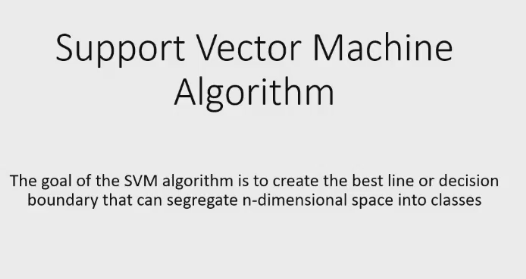

In [1]:
import pandas as pd
df = pd.read_csv('/content/bank-full.csv', sep = ';')

In [2]:
# What kind of datast is it? =>Its a categgorical Datasets.
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Checking is there is any null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa000cc5d50>,
      dtype=object)

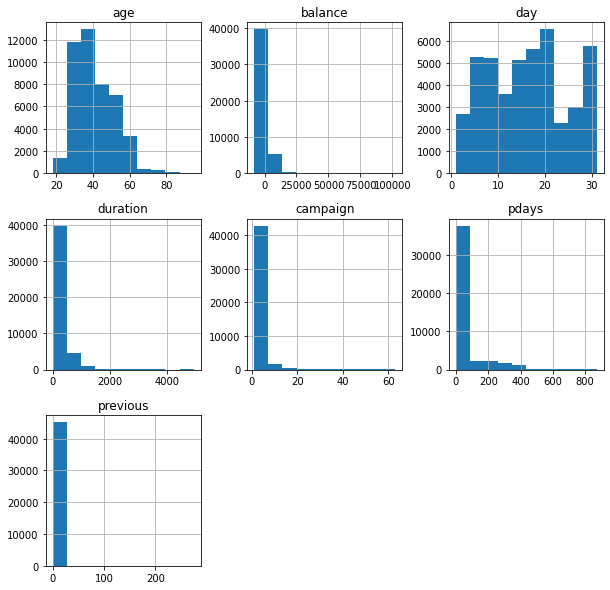

In [8]:
# Another way checking the null values by visualizing
import matplotlib.pyplot as plt

df.hist(figsize=(10,10))

In [9]:
# Droping the unnecessary data
df=df.drop('contact',axis =1)

In [10]:
# Another way of droping the unnecessary data
df.drop('poutcome',axis=1,inplace =True)

In [11]:
df.head()


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no


## Now Spliting dataset to X and Y

In [12]:
x =df.iloc[:,0:-1]
x

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0


In [13]:
y = df.iloc[:,-1]
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

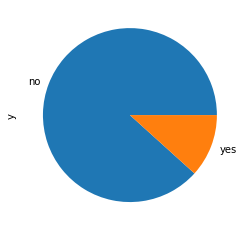

In [14]:
# Checking the target values
y.value_counts().plot.pie()

## Now mapping the necessary dataset

In [18]:
cols = ['job',	'marital',	'education',	'default','month',	'housing',	'loan'	]

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  x[col]=le.fit_transform(x[col])

In [20]:
x

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,17,9,977,3,-1,0
45207,71,5,0,0,0,1729,0,0,17,9,456,2,-1,0
45208,72,5,1,1,0,5715,0,0,17,9,1127,5,184,3
45209,57,1,1,1,0,668,0,0,17,9,508,4,-1,0


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

In [22]:
y

array([0, 0, 0, ..., 1, 0, 0])

## And now splinting the dataset to Test and train using sklearn

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

## Now calling the SVM libraries

In [24]:
from sklearn.svm import SVC # By deafult its a Radial 
svm = SVC()

svm.fit(x_train,y_train)

SVC()

In [25]:
svm.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

## Checking the accurecy score

In [27]:
pred = svm.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.8824505142098861

## Checking whather the model is overfited

In [32]:
pred = svm.predict(x_train)

In [33]:
accuracy_score(y_train,pred)

0.8833775713337757